# Neural Network
A notebook to explain and investigatie the working of neural networks

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Draw a neural network

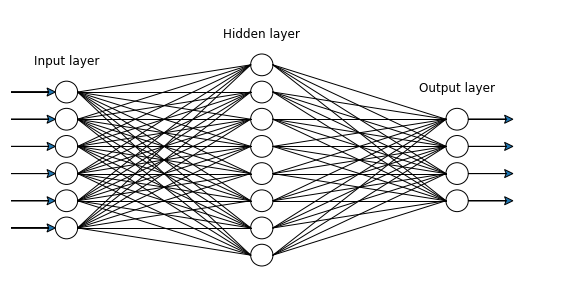

In [12]:
# set figure size
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlim((0, 20))
ax.set_ylim((0, 10))

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# configure figure
r = 0.4                               # size of circle for neuron
config = ((2,2,8),(9,1,9),(16,3,7))   # position of neurons x, y0, y1

# draw the neurons as circles 
layers = []
for x, i0, i1 in config:
    layer = []
    for i in range(i0, i1):
        circle = plt.Circle((x, i), r, facecolor='none', edgecolor='k')
        layer.append(circle)
    layers.append(layer)
    
for layer in layers:
    for circle in layer:
        ax.add_artist(circle)

# connecting lines between layers
for left, right in zip(config[:-1], config[1:]):
    left_x, left_y0, left_y1 = left
    right_x, right_y0, right_y1 = right 
    for left_y in range(left_y0, left_y1):
        for right_y in range(right_y0, right_y1):
            l = plt.Line2D(xdata=[left_x + r, right_x - r], 
                           ydata=[left_y, right_y],
                           color='k', 
                           linewidth=1)
            ax.add_line(l)
            
# arrow to inputs
x, i0, i1 = config[0]
for i in range(i0, i1):
    ax.arrow(0, i, 2-r, 0, 
             head_width=0.3, head_length=0.3, overhang = 0.2, length_includes_head= True)

# arrows out of outputs
x, i0, i1 = config[-1]
for i in range(i0, i1):
    ax.arrow(x+r, i, 2-r, 0, 
             head_width=0.3, head_length=0.3, overhang = 0.2, length_includes_head= True)

# annotations
ax.annotate("Input layer", 
            xy=(2,8), 
            fontsize=12, color='k', ha='center')    
    
ax.annotate("Hidden layer", 
            xy=(9,9), 
            fontsize=12, color='k', ha='center')    
    
ax.annotate("Output layer", 
            xy=(16,7), 
            fontsize=12, color='k', ha='center')    
    
# done
plt.show()

### Artifical Neuron

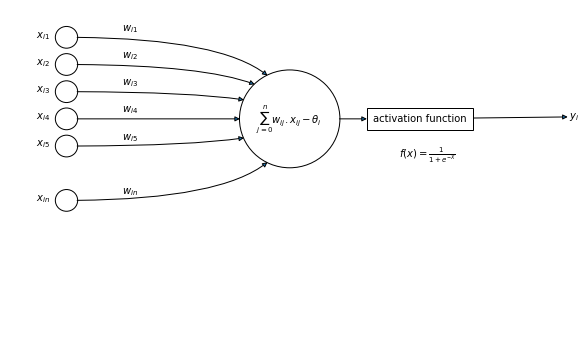

In [13]:
# set figure size
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim((0, 20))
ax.set_ylim((12, 0))

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# configure figure
x_neuron = 10
y_neuron = 4
r_neuron = 1.8

x_remote = 2
y_remotes = 1,2,3,4,5,7
r_remote = 0.4

# draw neuron as a circle
neuron = plt.Circle((x_neuron, y_neuron), r_neuron, 
                    facecolor='None', edgecolor='k')
ax.add_artist(neuron)

# draw remote neurons as a smaller circles
for y_remote in y_remotes:
    remote = plt.Circle((x_remote, y_remote), r_remote, 
                        facecolor='none', edgecolor='k')
    ax.add_artist(remote)
    
    # connecting arrows from remote neuron to central neuron
    ax.annotate('',
                xy = (x_neuron, y_neuron), xycoords = 'data',
                xytext = (x_remote, y_remote), textcoords = 'data',
                arrowprops = dict(arrowstyle = '-|>',
                                  shrinkA = 0, shrinkB = 0,
                                  patchA = remote, patchB = neuron,
                                  connectionstyle = 'angle3,angleA=0,angleB=90',
                                 ),
                )
    
    # annotate inputs
    ax.annotate(r'$x_{i%s}$' % ('n' if y_remote == 7 else y_remote),
                xy=(x_remote - 1.1, y_remote), xycoords='data'
               )

    # annotate weights
    ax.annotate(r'$w_{i%s}$' % ('n' if y_remote == 7 else y_remote),
                xy=(x_remote + 2, y_remote - 0.25), xycoords='data'
               )

# annotate neuron sum of weighted inputs minus bias
ax.annotate(r'$\sum_{j=0}^n w_{ij}.x_{ij} - \theta_i$',
            xy=(x_neuron - 1.2, y_neuron + 0.2), xycoords='data'
           )

# annotate activation function
activation = ax.text(x_neuron + 3, y_neuron + 0.1, 'activation function',
                     bbox=dict(boxstyle='square,pad=0.6', fc='w', ec='k'))

# annotate sigmoid formula
ax.text(x_neuron + 3.9, y_neuron + 1.4, r'$f(x) = \frac{1}{1 + e^{-X}}$')

# draw arrows
ax.annotate('',
            xy = (x_neuron + 4, y_neuron), xycoords = 'data',
            xytext = (x_neuron, y_neuron), textcoords = 'data',
            arrowprops = dict(arrowstyle = '-|>',
                              shrinkA = 0, shrinkB = 0,
                              patchA = neuron, patchB = activation,
                             ),
            )

# annotate outputs
ax.annotate(r'$y_i$',
            xy = (x_neuron + 4, y_neuron), textcoords = 'data',
            xytext = (x_neuron + 10, y_neuron), xycoords = 'data',
            arrowprops = dict(arrowstyle = '<|-',
                              shrinkA = 6, shrinkB = 0,
                              patchA = None, patchB = activation,
                             ),
            )

# done
plt.show()

### Artificial neuron implementation

In [14]:
# activation functions
logistic = lambda x: 1 / (1 + np.exp(-x))    # also called 'Sigmoid' or 'Soft Step'
identity = lambda x: x
tanh = lambda x: np.tanh(x)
arctan = lambda x: np.arctan(x)
relu = lambda x: np.where(x<0, 0, x)
step = lambda x: np.where(x<0, 0, 1)

In [93]:
def artificial_neuron(inputs, weights, bias = 0, activation_function = logistic):
    weighted_sum = np.sum(np.multiply(weights, inputs), axis=1) + bias
    return activation_function(weighted_sum)

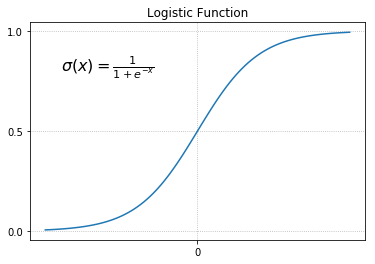

In [16]:
x = np.linspace(-5, 5, 100)
y = logistic(x)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, y)
ax = fig.gca()
ax.set_xticks([0])
ax.set_yticks([0, 0.5, 1])
ax.grid(linestyle = ':')
plt.title('Logistic Function')
ax.text(-4.5, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)

plt.show()

In [17]:
inputs = np.array([1,0,1,0])
weights = np.array([[1,1,0,0]])
bias = 0

output = artificial_neuron(inputs, weights, bias)
print(output)

[0.73105858]


### A Neural network with 5x5 inputs
5 horizontal lines and 5 vertical lines

In [62]:
n = 5
x = np.arange(n)
y = np.arange(n)

xx, yy = np.meshgrid(x, y)

In [63]:
horizontal_lines = [(lambda x, y: np.where(y==i,1,0))(xx,yy) for i in range(n)]
vertical_lines = [(lambda x, y: np.where(x==i,1,0))(xx,yy) for i in range(n)]
#crosses
#squares

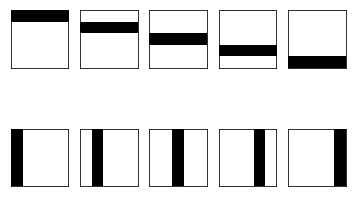

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=5)

# remove ticks and labels
for ax in axes.flat:
    ax.get_xaxis().set_ticks([])
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticks([])
    ax.get_yaxis().set_ticklabels([])

for i in range(5):
    axes[0][i].imshow(horizontal_lines[i], cmap = plt.get_cmap('Greys'))
for i in range(5):
    axes[1][i].imshow(vertical_lines[i], cmap = plt.get_cmap('Greys'))

plt.show()

In [65]:
shapes = horizontal_lines + vertical_lines
inputs = np.array(shapes).reshape(2 * n, n*n)
print(inputs)

[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [66]:
levels = {0:'horizontal', 1:'vertical'}
labels = np.array([0,0,0,0,0,1,1,1,1,1]).astype('float64')

### Scale inputs

In [75]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

inputs = inputs.astype('float64')
print(inputs)

scale = preprocessing.StandardScaler()
scale.fit(inputs)

scaled_inputs = scale.transform(inputs)
print(scaled_inputs)

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
  1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1.]]
[[ 2.   2.   2.   2.   2.  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5  2.   2.   2.   2.   2.  -0.5 -0.5 -0.5 -0

### Train a neural network

In [114]:
nn_mod = MLPClassifier(hidden_layer_sizes = (10,),
                       activation='logistic',    # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’
                       solver='lbfgs', 
                       verbose=10
                      )

nn_mod.fit(scaled_inputs, labels)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [110]:
[coef.shape for coef in nn_mod.coefs_]

[(25, 10), (10, 1)]

In [111]:
nn_mod.classes_

array([0., 1.])

In [112]:
n_layers = nn_mod.n_layers_
weights = nn_mod.coefs_
biases = nn_mod.intercepts_

np.set_printoptions(precision=3, suppress=True)

print('Number of layers = %d' % n_layers)

print('\nCoefficients')
print('shape ' + str([coef.shape for coef in nn_mod.coefs_]))
for layer in range(n_layers-1):
    print('\nLayer %d' % layer)
    print('Weights')
    print(weights[layer])
    print('Biases ')
    print(biases[layer])

Number of layers = 3

Coefficients
shape [(25, 10), (10, 1)]

Layer 0
Weights
[[ 0.668  3.491 -1.917  0.008  2.506  1.48   0.088 -0.386  1.644 -1.82 ]
 [-0.696  1.874 -0.426  0.279  1.74   1.819 -0.281 -0.278  0.559 -3.331]
 [-1.366  2.231 -1.725 -1.405  0.142  1.671  2.052 -1.21  -0.01  -0.913]
 [ 0.402  3.483 -1.552 -1.761 -1.506  0.699 -0.039 -0.221 -0.068 -2.697]
 [ 0.21   1.07  -0.454 -1.779  1.291  0.426 -0.009 -1.169 -0.129 -3.293]
 [ 0.848 -0.244 -0.544  0.171  2.486  0.305 -0.288  0.116  2.041  1.249]
 [-0.624 -1.903  1.005  0.293  1.862  0.28  -0.353  0.04   1.227 -0.372]
 [-1.285 -1.712 -0.556 -1.568  0.361  0.533  1.669 -0.676  0.689  1.673]
 [ 0.567 -0.212 -0.238 -1.804 -1.333 -0.655 -0.617  0.325  0.227  0.306]
 [ 0.757 -2.533  0.805 -1.939  1.245 -1.065 -0.271 -0.737  0.273 -0.379]
 [ 0.662  0.441 -0.18   1.674  0.836  0.102 -1.818  0.915  1.563  2.088]
 [-0.644 -0.908  1.064  1.596  0.166  0.212 -1.583  0.877  0.357  0.545]
 [-1.263 -1.024 -0.471 -0.355 -1.228  0.32   0

### Prediction

In [99]:
test_data = np.array([[[1,0,0,0,0],
                       [0,1,0,0,0],
                       [0,0,1,0,0],
                       [0,0,0,1,1],
                       [0,0,0,0,0]]]).astype('float64').reshape(1,25)

scaled_test_data = scale.transform(test_data)

predictions = nn_mod.predict(scaled_test_data)

np.array(scaled_test_data)

array([[ 2. , -0.5, -0.5, -0.5, -0.5, -0.5,  2. , -0.5, -0.5, -0.5, -0.5,
        -0.5,  2. , -0.5, -0.5, -0.5, -0.5, -0.5,  2. ,  2. , -0.5, -0.5,
        -0.5, -0.5, -0.5]])

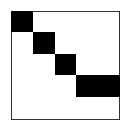

Predicted: vertical


In [100]:
fig, ax = plt.subplots(figsize=(2,2))

# remove ticks and labels
ax.get_xaxis().set_ticks([])
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])

ax.imshow(scaled_test_data[0].reshape(5,5), cmap = plt.get_cmap('Greys'))

plt.show()

print('Predicted: ' + levels[predictions[0]])

In [90]:
print(nn_mod.predict_proba(scaled_inputs))
print(nn_mod.predict_proba(test_data.reshape(1,25)))

[[1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.999 0.001]
 [0.    1.   ]
 [0.    1.   ]
 [0.001 0.999]
 [0.    1.   ]
 [0.    1.   ]]
[[0.037 0.963]]


### Manual calculation

In [91]:
y1 = artificial_neuron(inputs[9], weights[0].T, biases[0])
print(y1)

[0.961 0.647 0.026 0.966 0.045 0.452 0.103 0.072 0.472 0.899]


In [94]:
y2 = artificial_neuron(y1, weights[1].T, biases[1])
print(y2)

[0.048]


# MNIST

In [213]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)

(70000, 784)


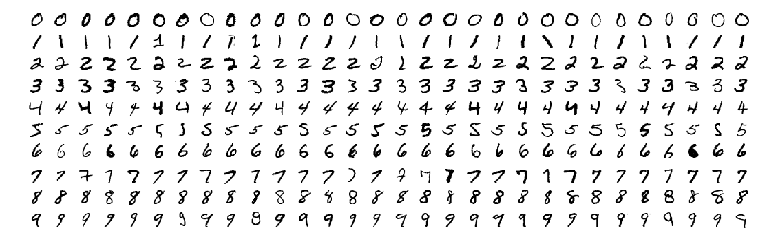

In [216]:
nrows, ncols = 10, 30
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13,4))

for irow, axes_row in enumerate(axes):
    images = X[y==str(irow)]
    for icol, ax in enumerate(axes_row):
        ax.axison = False
        ax.imshow(images[icol].reshape(28, 28), 
                  cmap = plt.cm.gray_r)

plt.show()

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05529723
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


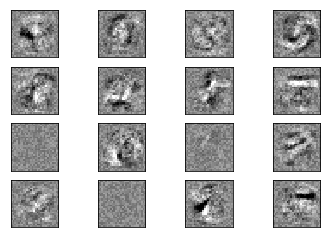

In [194]:
from sklearn.neural_network import MLPClassifier

X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=10, 
                    alpha=1e-4,
                    solver='sgd', 
                    verbose=10, 
                    tol=1e-4, 
                    random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()